In [1]:
import numpy as np
import scipy.signal
from scipy.optimize import minimize
from datetime import datetime
from fur.one_data_set_analyzer import analyze_one_dataset
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from datetime import datetime
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import seaborn as sns
import sys
import os
import fur.path_assistant as path_assistant
from fur.waveform_reader import read_waveform
from fur.finding_period import get_period
from fur.fluctuations import get_fluctiation_and_noise_var
shift_03_21_2020 = path_assistant.PathAssistant('shift_03_21_2020')
waveforms_dir = shift_03_21_2020.get_waveforms_dir()
results_dir = shift_03_21_2020.get_results_dir()
from config import get_from_config, save_to_config

In [2]:
t1 = datetime(2020, 3, 21, 12, 45, 0)
t2 = datetime(2020, 3, 21, 13, 20, 0)

There are 13 files in this data set.
Started working on the file  RefCurve_2020-03-21_0_124604.Wfm.bin (1/13)
period = 3332.4478


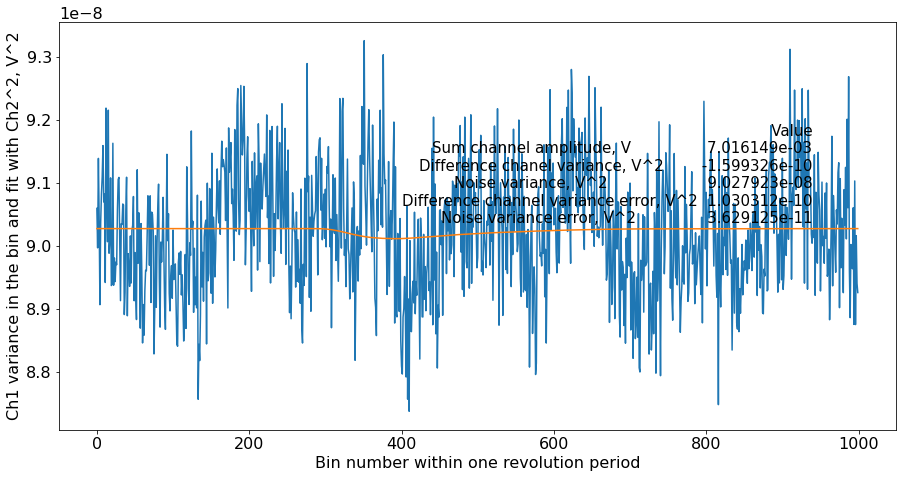

Sum amplitude = 0.00702 V
Finished working on  RefCurve_2020-03-21_0_124604.Wfm.bin (1/13)
Started working on the file  RefCurve_2020-03-21_0_131842.Wfm.bin (2/13)
period = 3332.4478


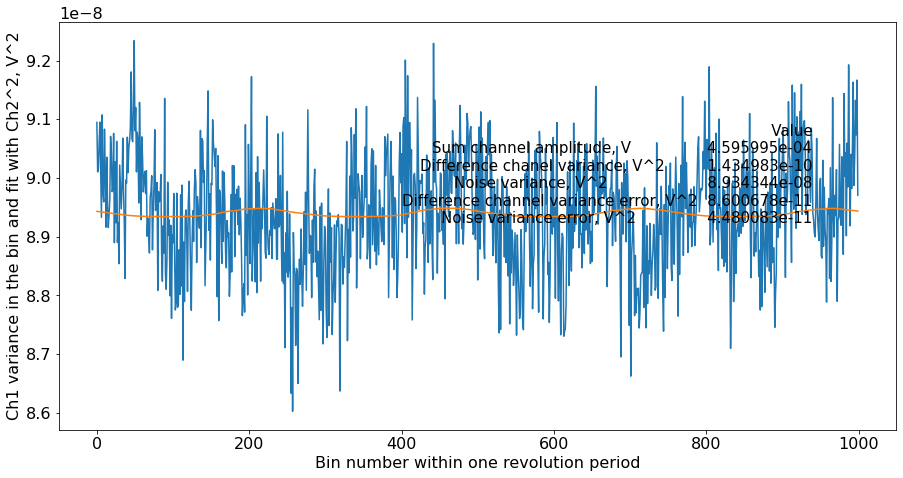

Sum amplitude = 0.00046 V
Finished working on  RefCurve_2020-03-21_0_131842.Wfm.bin (2/13)
Started working on the file  RefCurve_2020-03-21_10_131143.Wfm.bin (3/13)
period = 3332.4478


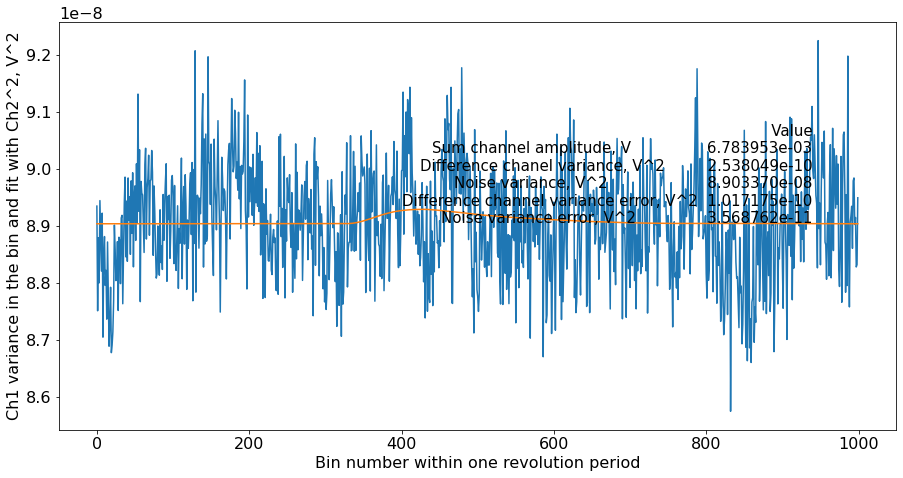

Sum amplitude = 0.00678 V
Finished working on  RefCurve_2020-03-21_10_131143.Wfm.bin (3/13)
Started working on the file  RefCurve_2020-03-21_1_124702.Wfm.bin (4/13)
period = 3332.4478


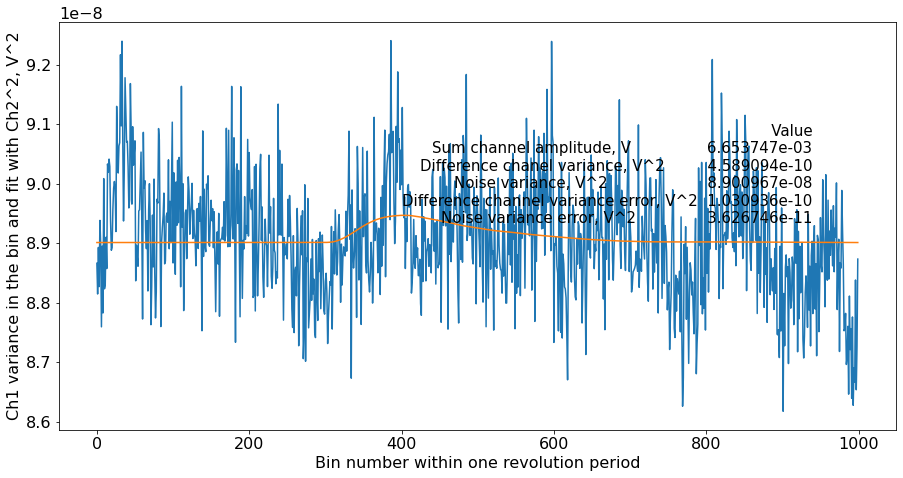

Sum amplitude = 0.00665 V
Finished working on  RefCurve_2020-03-21_1_124702.Wfm.bin (4/13)
Started working on the file  RefCurve_2020-03-21_1_131912.Wfm.bin (5/13)
period = 3332.4478


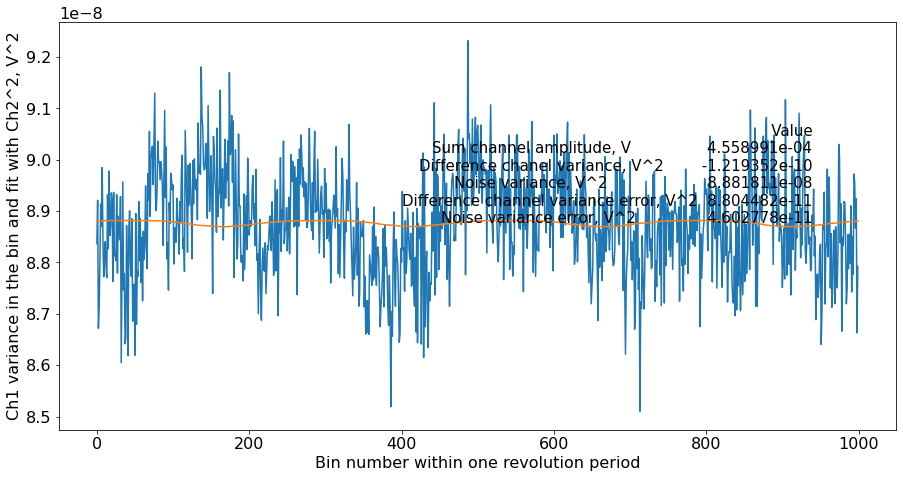

Sum amplitude = 0.000456 V
Finished working on  RefCurve_2020-03-21_1_131912.Wfm.bin (5/13)
Started working on the file  RefCurve_2020-03-21_2_124740.Wfm.bin (6/13)
period = 3332.4478


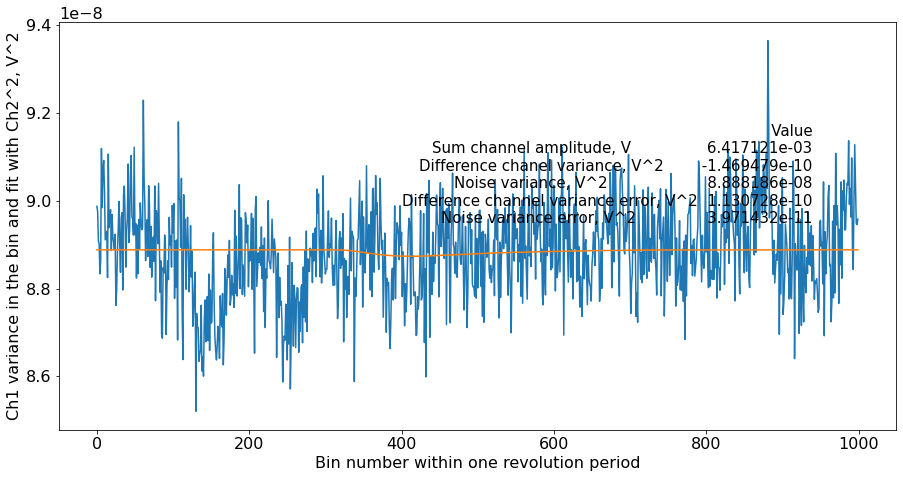

Sum amplitude = 0.00642 V
Finished working on  RefCurve_2020-03-21_2_124740.Wfm.bin (6/13)
Started working on the file  RefCurve_2020-03-21_3_124818.Wfm.bin (7/13)
period = 3332.4478


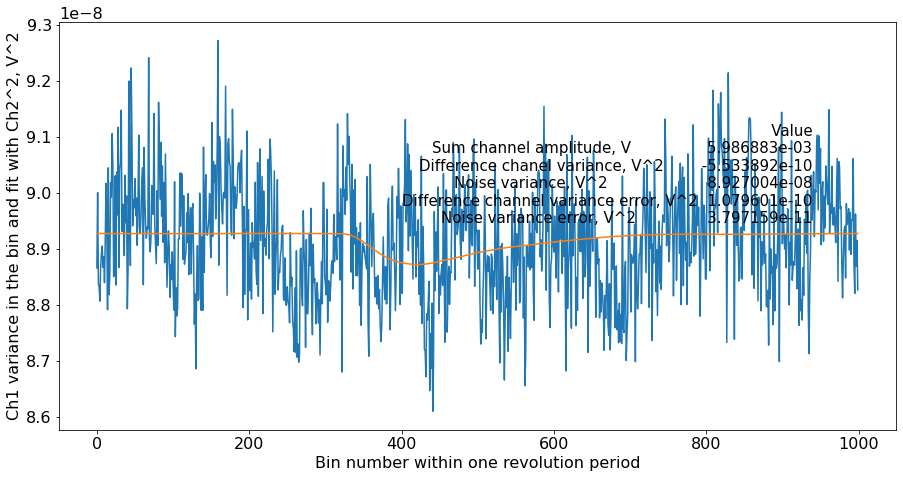

Sum amplitude = 0.00599 V
Finished working on  RefCurve_2020-03-21_3_124818.Wfm.bin (7/13)
Started working on the file  RefCurve_2020-03-21_4_124930.Wfm.bin (8/13)
period = 3332.4478


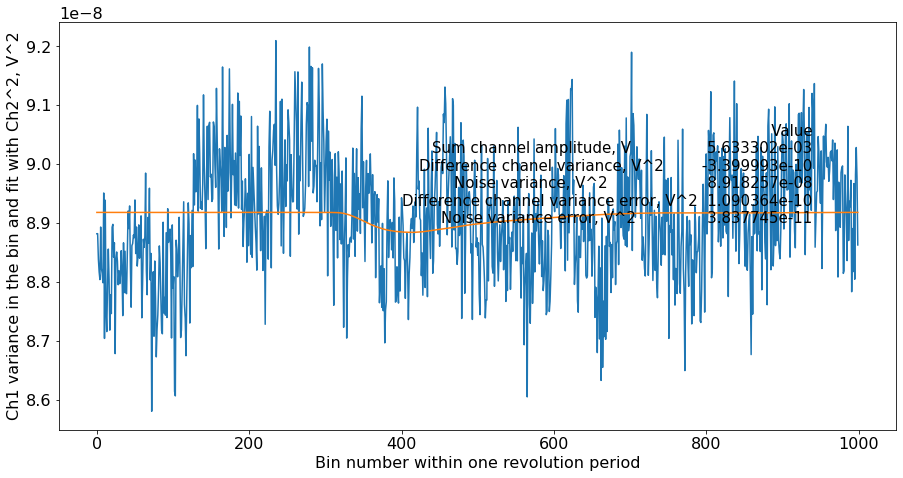

Sum amplitude = 0.00563 V
Finished working on  RefCurve_2020-03-21_4_124930.Wfm.bin (8/13)
Started working on the file  RefCurve_2020-03-21_5_124955.Wfm.bin (9/13)
period = 3332.4478


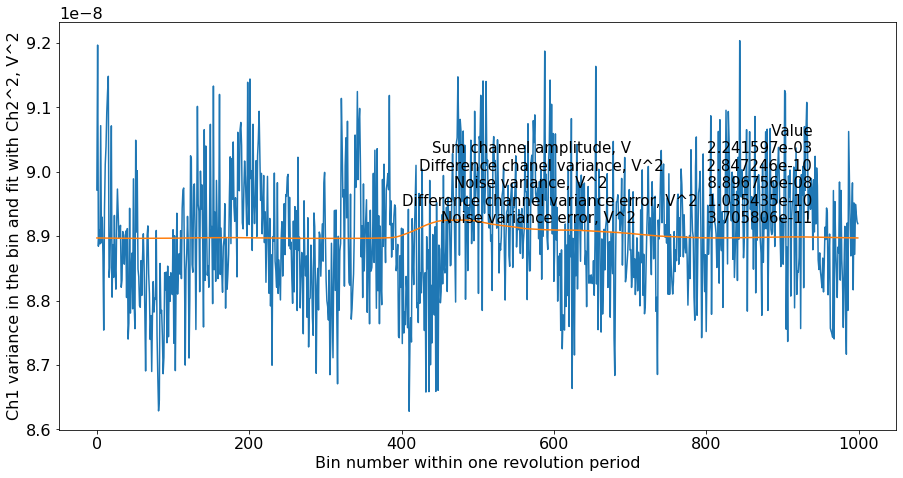

Sum amplitude = 0.00224 V
Finished working on  RefCurve_2020-03-21_5_124955.Wfm.bin (9/13)
Started working on the file  RefCurve_2020-03-21_6_125443.Wfm.bin (10/13)
period = 3332.4478


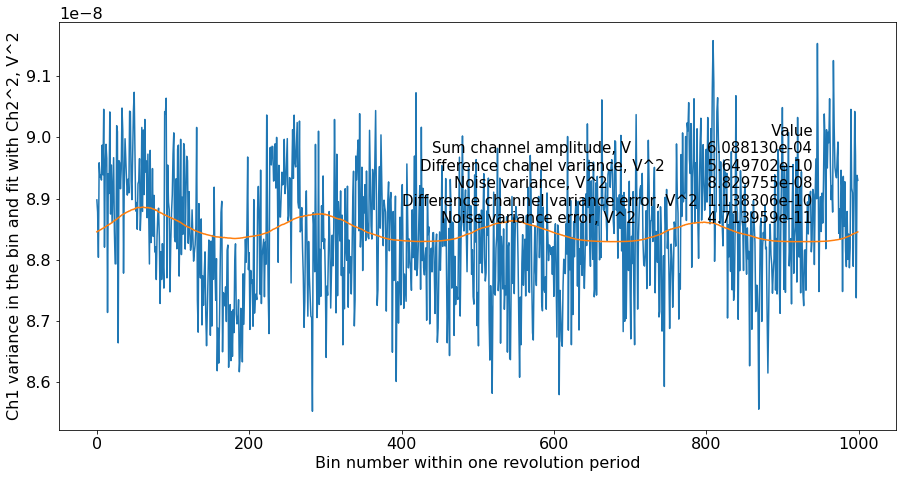

Sum amplitude = 0.000609 V
Finished working on  RefCurve_2020-03-21_6_125443.Wfm.bin (10/13)
Started working on the file  RefCurve_2020-03-21_7_125544.Wfm.bin (11/13)
period = 3332.4478


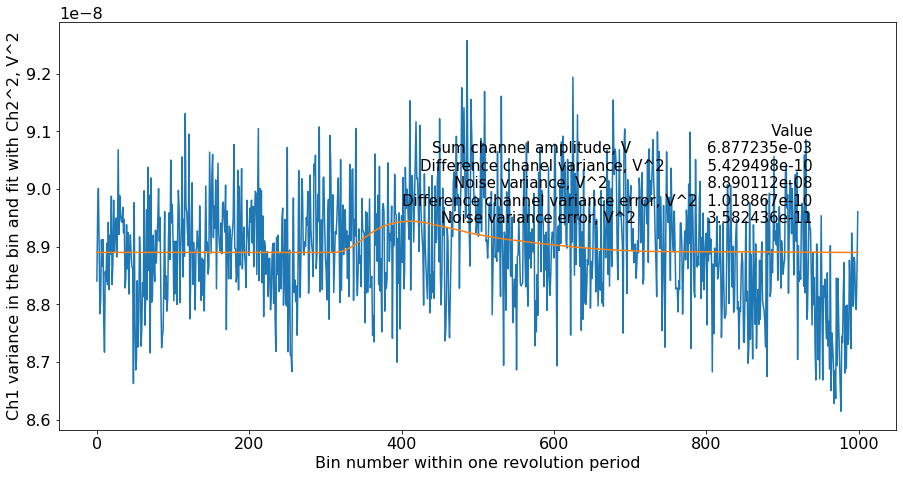

Sum amplitude = 0.00688 V
Finished working on  RefCurve_2020-03-21_7_125544.Wfm.bin (11/13)
Started working on the file  RefCurve_2020-03-21_8_130136.Wfm.bin (12/13)
period = 3332.4478


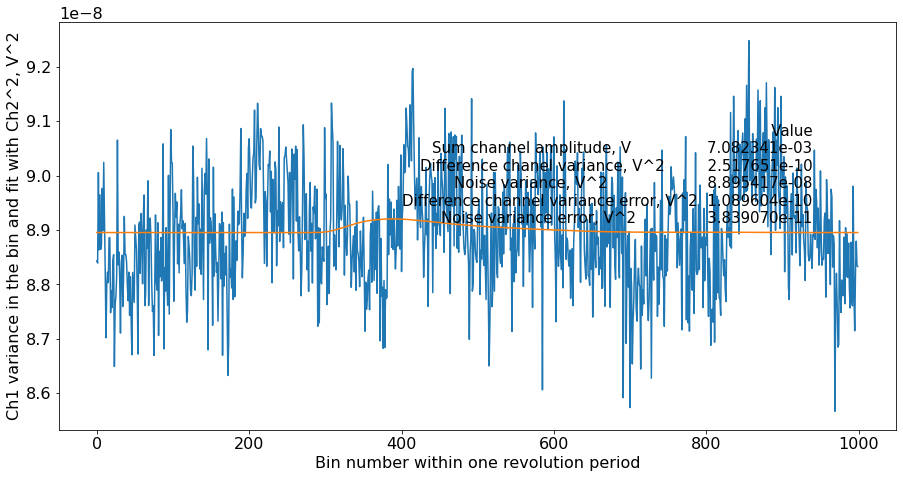

Sum amplitude = 0.00708 V
Finished working on  RefCurve_2020-03-21_8_130136.Wfm.bin (12/13)
Started working on the file  RefCurve_2020-03-21_9_130748.Wfm.bin (13/13)
period = 3332.4478


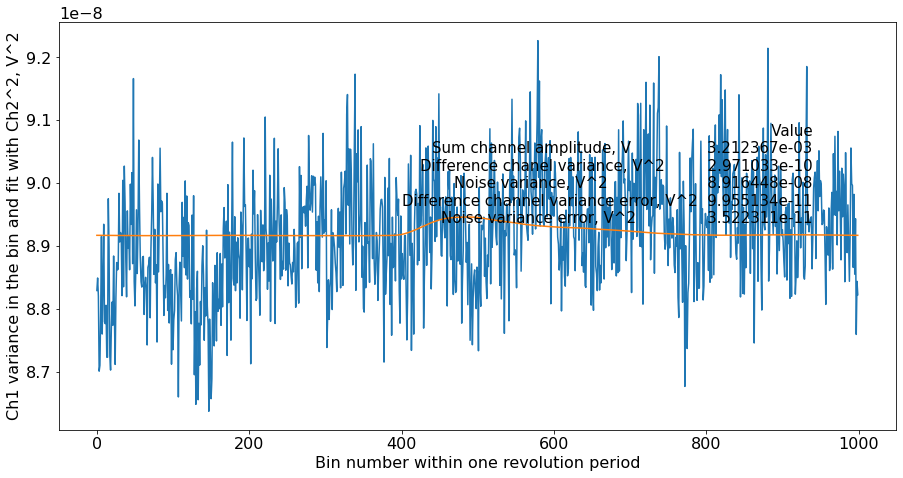

Sum amplitude = 0.00321 V
Finished working on  RefCurve_2020-03-21_9_130748.Wfm.bin (13/13)
Results saved to /mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_21_2020/results/noise_03_21_2020


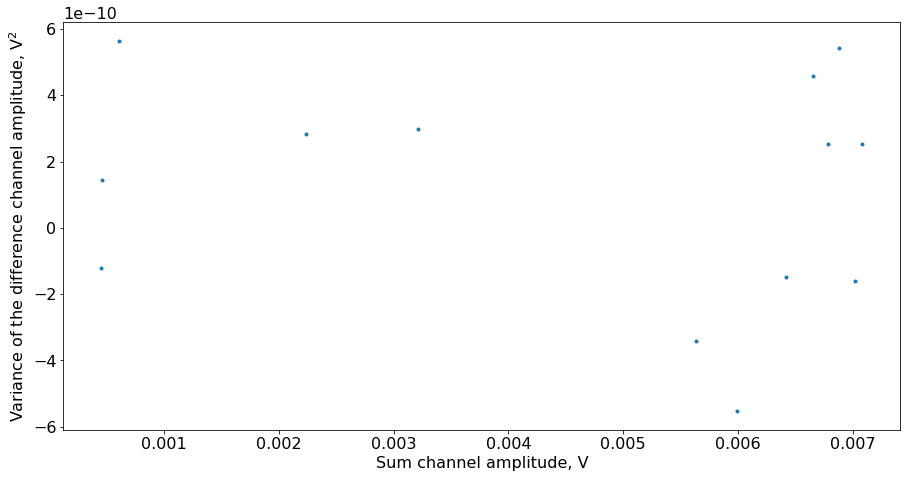

In [3]:
# base_name = "noise_03_21_2020"
# res_df = analyze_one_dataset(
#     shift_03_21_2020,
#     base_name,
#     t1,
#     t2,
#     period_in=3332.4478)

# Calculation of std of ch1_var in the pabove plots:

In [5]:
std_of_ch1_var = {}
for i, wf in enumerate(shift_03_21_2020.get_waveform_paths()):
    print(i)
    ch1, ch2 = read_waveform(wf)
    period = get_period(ch2)
    output = {}
    get_fluctiation_and_noise_var(ch1, ch2, period, n_bins=1000,
                                  show_plots=False, fit_method='lstsq',
                                  output_dic=output)
    std_of_ch1_var[wf] = output["std_of_ch1_var"]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [9]:
list(std_of_ch1_var.values())

[1.0319363e-09,
 6.465048e-10,
 8.910658e-10,
 9.724713e-10,
 6.049935e-10,
 9.548925e-10,
 3.787412e-10,
 9.934248e-10,
 3.9559003e-10,
 9.63719e-10,
 7.9377427e-10,
 6.2748007e-10,
 9.525548e-10,
 9.333694e-10,
 8.582141e-10]

In [10]:
np.mean(list(std_of_ch1_var.values()))

7.9991547e-10

In [11]:
sum_channel_to_photoelectrons = get_from_config("sum_channel_to_photoelectrons")

In [13]:
varN_error_fit = np.sqrt(2)*2*sum_channel_to_photoelectrons**2*np.mean(list(std_of_ch1_var.values()))
varN_error_fit

2603607.3009714563

In [15]:
save_to_config("varN_error_fit", varN_error_fit)

In [3]:
sum_channel_to_photoelectrons = get_from_config('sum_channel_to_photoelectrons')

In [4]:
2*sum_channel_to_photoelectrons**2*9e-8

207137579.9322541

# Zero current, for APT seminar

In [3]:
wf = shift_03_21_2020.get_waveform_path('RefCurve_2020-03-21_1_131912.Wfm.bin')

In [4]:
ch1, ch2 = read_waveform(wf)

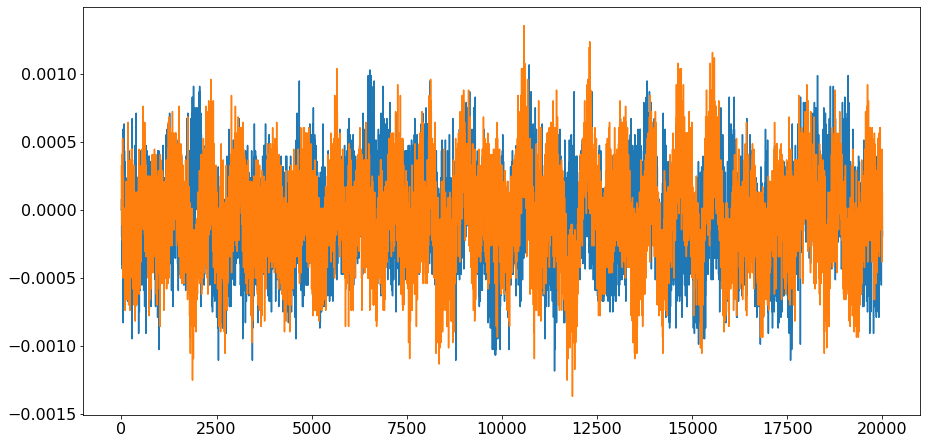

In [5]:
n = 20000
plt.plot(ch1[:n])
plt.plot(ch2[:n])

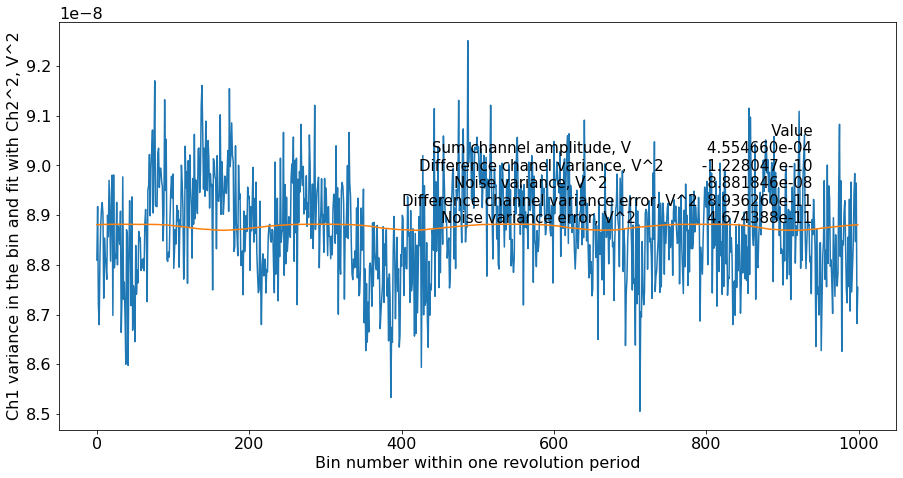

(0.0004554659826681018,
 -1.2280465849120186e-10,
 8.881846143208004e-08,
 8.936259752370213e-11,
 4.6743884403632155e-11)

In [6]:
period = 3332.447695119744
output = {}
get_fluctiation_and_noise_var(ch1, ch2, period, n_bins=1000,
                              show_plots=True, fit_method='lstsq',
                              output_dic=output)

In [7]:
varch1_df = output['var_ch1_df']

Text(0.5, 0, 'Time within one IOTA revolution, \\SI{}{ns}')

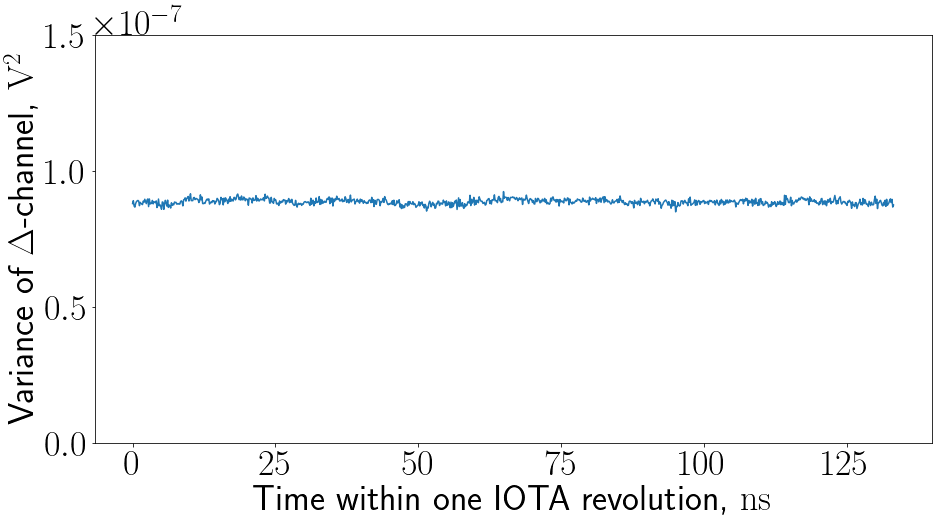

In [8]:
plt.rcParams["text.usetex"] =True
plt.rc('text.latex', preamble=r'\usepackage{siunitx}')
plt.rcParams.update({'font.size': 36,'legend.fontsize':22})
fig, ax = plt.subplots(figsize=[15, 7.5])
ax.plot(0.04*varch1_df['t'], varch1_df['var_ch1'])
ax.set_ylim(0, 1.5e-7)
ax.set_ylabel('Variance of $\Delta$-channel, \SI{}{V^2}')
ax.set_xlabel('Time within one IOTA revolution, \SI{}{ns}')

In [9]:
varch1_df.to_csv(
    shift_03_21_2020.get_results_dir().fi("no_beam_noise_level.csv"),
    index=None)